# Soft dynamic time warping with variable step weights

Johannes Zeitler, Michael Krause, Meinard Müller, ICASSP 2024

johannes.zeitler@audiolabs-erlangen.de

## Overview

In this notebook, we demonstrate the usage of weighted soft dynamic time warping (SDTW). Therefore, we generate a random sequence $X \in \mathrm{R}^{N\times d}$, which we align to a random target sequence $Y \in \mathrm{R}^{M\times d}$. We specify step weights for the vertical, horizontal, and diagonal step as $[w_v, w_h, w_d]$. For each scenario, we plot the expected alignment matrix $\mathbf{E}\in\mathrm{R}^{M\times N}$.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from weightedSDTW import weightedSDTW as wSDTW

In [3]:
# dimensionality of the data
d = 12

# softmin temperature
gamma = 0.1

# batch size
nBatch = 1

# whether to use cpu or cuda backend
device="cpu"

In [4]:
# a set of step weights which we try out
weights_list = [[1,1,1], [1,0,1], [1,1,2]]

### 1) Equal sequence lengths
We observe a diagonalization behavior for equal step weights [1,1,1]. Adjusting the diagonal step weight to [1,1,2] solves this issue.

In [5]:
# prediction length
N = 500
# target length
M = 500

# feature sequence
X = torch.rand((nBatch, N, d), requires_grad=True).to(device)

# target sequence
Y = torch.rand((nBatch, M, d)).to(device)

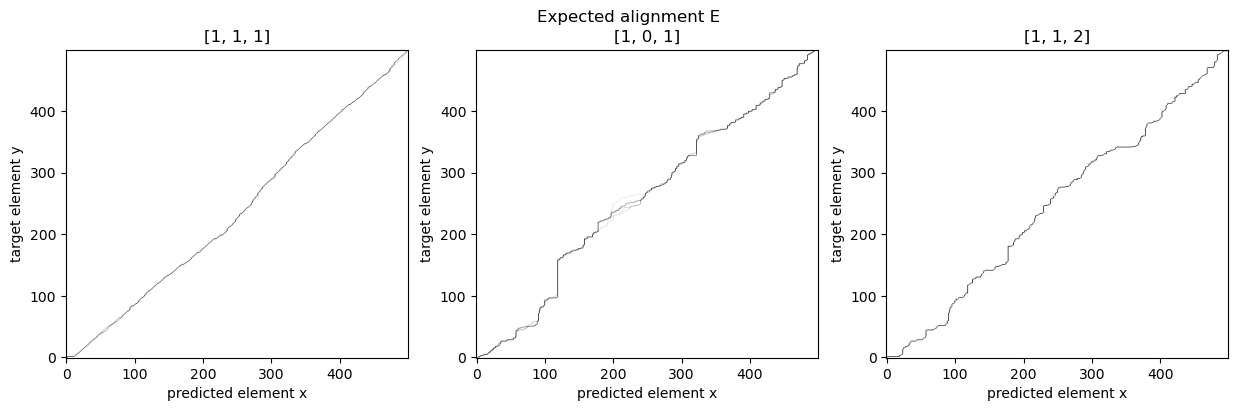

In [6]:
fig, ax = plt.subplots(1, len(weights_list), figsize=(15,4))
for i, weights in enumerate(weights_list):

    # initialize the SDTW loss function
    sdtw = wSDTW(use_cuda=device=="cuda", gamma=gamma, dist_func=None, weights=torch.Tensor(weights).to(device))
    
    # compute the loss
    loss = sdtw(X,Y)
    
    # compute the gradient w.r.t. the input X
    grad = torch.autograd.grad(loss, X)[0]
    
    ax[i].imshow(sdtw.dtw_class.E[0].detach().cpu().numpy(), aspect='auto', origin='lower', cmap='gray_r')
    ax[i].set_title(weights)
    
    ax[i].set_xlabel("predicted element x")
    ax[i].set_ylabel("target element y")
fig.suptitle("Expected alignment E")   
plt.show()

### 2) Different sequence lengths

We observe a collapse to single target frames for equal step weights [1,1,1]. Reducing the horizontal step weight [1,0,1] solves this issue.

In [7]:
# prediction length
N = 500
# target length
M = 50

X = torch.rand((nBatch, N, d), requires_grad=True).to(device)

Y = torch.rand((nBatch, M, d)).to(device)

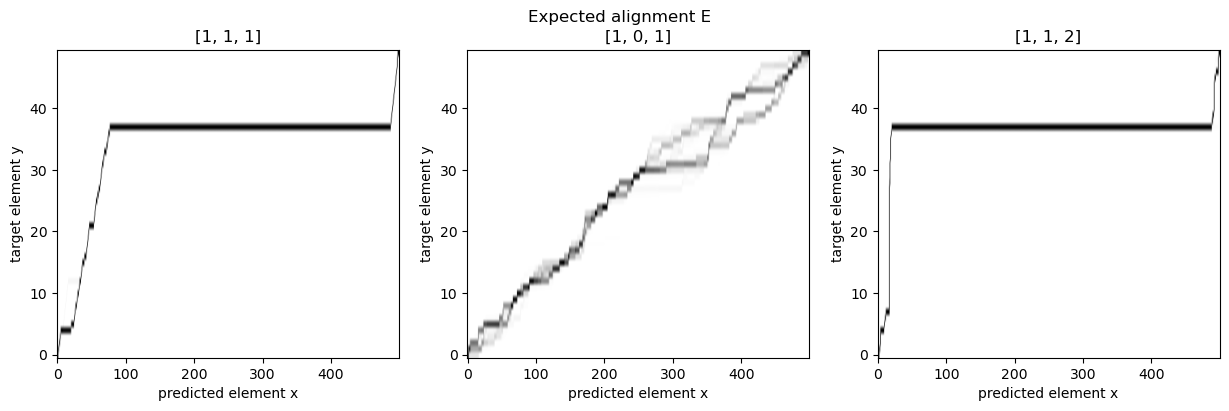

In [8]:
fig, ax = plt.subplots(1, len(weights_list), figsize=(15,4))
for i, weights in enumerate(weights_list):

    sdtw = wSDTW(use_cuda=device=="cuda", gamma=gamma, dist_func=None, weights=torch.Tensor(weights).to(device))
    loss = sdtw(X,Y)
    grad = torch.autograd.grad(loss, X)[0]
    
    ax[i].imshow(sdtw.dtw_class.E[0].detach().cpu().numpy(), aspect='auto', origin='lower', cmap='gray_r')
    ax[i].set_title(weights)
    
    ax[i].set_xlabel("predicted element x")
    ax[i].set_ylabel("target element y")
    
fig.suptitle("Expected alignment E")
plt.show()